Pipeline for Product Review Sentiment Classification and Ranking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')
import sys, os
sys.path.append(os.path.abspath('../../..'))  # adjust levels to reach project root
from utils.dataframe import load_and_clean_data
from models.classifiers.classifier_model import prepare_data, create_stratified_split, train_baseline_model, predict_full_dataset, run_complete_pipeline


# Load data

In [2]:
# 1. Load the Data
df = load_and_clean_data()

Processing DataFrame from '1429_1.csv'...
Finished processing '1429_1.csv'. Found 34660 rows.
Processing DataFrame from 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'...
Finished processing 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'. Found 5000 rows.
Processing DataFrame from 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'...
Finished processing 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'. Found 28332 rows.

Merging all datasets...
Total rows after merge: 67992
Filled 1636 product names based on ID.
Filled remaining 5124 NA names with 'Unknown Product'.
Dropped 2153 duplicate reviews.
Dropped 53 rows due to missing (MUST HAVE) data.
Final merged dataset has 65786 rows.



STARTING COMPLETE PIPELINE
PART 1: DATA PREPARATION

Dataset shape: (65786, 16)

Sentiment distribution:
sentiment
positive    60478
neutral      2839
negative     2469
Name: count, dtype: int64

Sentiment percentages:
sentiment
positive    91.931414
neutral      4.315508
negative     3.753078
Name: proportion, dtype: float64

CREATING STRATIFIED TRAIN-TEST SPLIT

Train set size: 52628
Test set size: 13158

Train set distribution:
sentiment
positive    48382
neutral      2271
negative     1975
Name: count, dtype: int64

Test set distribution:
sentiment
positive    12096
neutral       568
negative      494
Name: count, dtype: int64

PART 2: BASELINE MODEL - LOGISTIC REGRESSION

Vectorizing text with TF-IDF...
TF-IDF matrix shape: (52628, 5000)

Training Logistic Regression (with class balancing)...

--------------------------------------------------------------------------------
BASELINE MODEL EVALUATION
--------------------------------------------------------------------------------



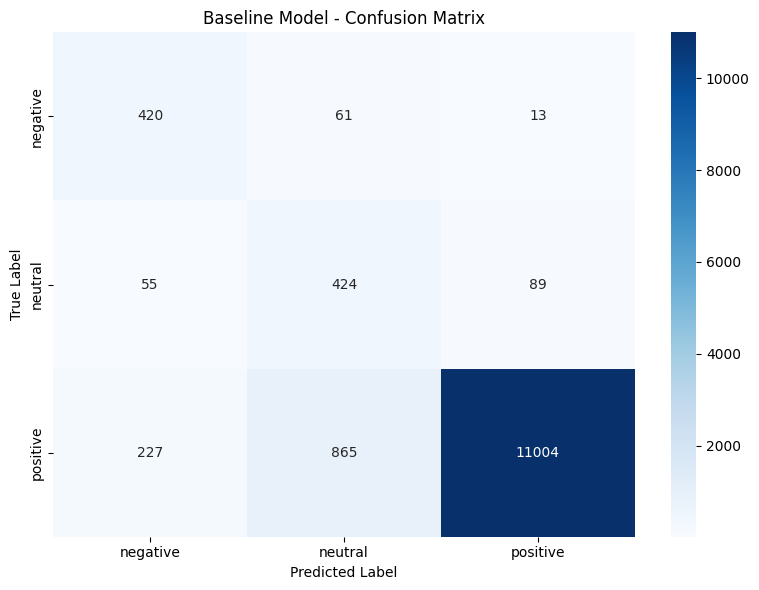


PART 4: PREDICTING ON FULL DATASET

Using Baseline Model for predictions...

Predictions complete!
Predicted sentiment distribution:
predicted_sentiment
positive    55565
neutral      6710
negative     3511
Name: count, dtype: int64

Saved full predictions to: ../../../results/sentiment_analysis_linear_regression.csv

PIPELINE COMPLETE!


In [ ]:
df = run_complete_pipeline(df, '../../../results')

In [ ]:
df.head()


,id,product_name,categories,review_rating,review_text,review_title,image_urls,review_date,review_recommend,review_helpful_count,source_urls,review_username,review_username,data_source,sentiment,combined_text,predicted_sentiment,confidence_score,positive_proba
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,Adapter,Adapter,1429_1.csv,positive,Kindle This product so far has not disappointe...,positive,0.937978,0.937978
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,truman,truman,1429_1.csv,positive,very fast great for beginner or experienced pe...,positive,0.584655,0.584655
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,DaveZ,DaveZ,1429_1.csv,positive,Beginner tablet for our 9 year old son. Inexpe...,neutral,0.700156,0.275081
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,Shacks,Shacks,1429_1.csv,positive,Good!!! I've had my Fire HD 8 two weeks now an...,positive,0.981253,0.981253
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,2017-01-12T00:00:00.000Z,True,0.0,NaN,explore42,explore42,1429_1.csv,positive,Fantastic Tablet for kids I bought this for my...,positive,0.972545,0.972545


In [ ]:
# ============================================================================
# MAIN EXECUTION PIPELINE
# ============================================================================

def run_complete_pipeline1(df):
    """
    Execute the complete pipeline from data prep to ranking
    
    Args:
        df: DataFrame with columns ['product_name', 'categories', 'review_rating',
                                     'review_text', 'review_title']
    """
    print("\n" + "=" * 80)
    print("STARTING COMPLETE PIPELINE")
    print("=" * 80)
    
    # Step 1: Prepare data
    df = prepare_data(df)
    
    # Step 2: Create train-test split
    X_train, X_test, y_train, y_test = create_stratified_split(df)
    
    # Step 3: Train model
    # Option 1: Train baseline model
    lr_model, vectorizer, y_pred_lr, y_pred_proba_lr = train_baseline_model(
        X_train, y_train, X_test, y_test
    )
    
    # Option 2: DistilBERT Model
    # Uncomment if you have transformers installed and GPU available
    # distilbert_model, tokenizer, y_pred_bert, y_pred_proba_bert = train_distilbert_model(
    #     X_train, y_train, X_test, y_test
    # )
    
    # Step 4: Predict on full dataset
    df_with_predictions = predict_full_dataset(df, lr_model, vectorizer, model_type='baseline')
    
    # Step 5: Calculate product scores
    #product_stats = calculate_product_scores(df)
    
    # Step 6: Get top products per category
    #top_products = get_top_products(product_stats, top_n=3)
    
    # Step 7: Visualize
    #visualize_rankings(top_products)
    
    print("\n" + "=" * 80)
    print("PIPELINE COMPLETE!")
    print("=" * 80)
    
    return df_with_predictions #df, product_stats, top_products



To use this pipeline with your data:

1. Load your DataFrame:
   df = pd.read_csv('your_reviews.csv')

2. Ensure it has these columns:
   ['product_name', 'categories', 'review_rating', 'review_text', 'review_title']

3. Run the pipeline:
   df, product_stats, top_products = run_complete_pipeline(df)

4. Export results:
   top_products.to_csv('top_products_ranked.csv', index=False)


STARTING COMPLETE PIPELINE
PART 1: DATA PREPARATION

Dataset shape: (59029, 18)

Sentiment distribution:
sentiment
positive    54078
neutral      2629
negative     2322
Name: count, dtype: int64

Sentiment percentages:
sentiment
positive    91.612597
neutral      4.453743
negative     3.933660
Name: proportion, dtype: float64

CREATING STRATIFIED TRAIN-TEST SPLIT

Train set size: 47223
Test set size: 11806

Train set distribution:
sentiment
positive    43262
neutral      2103
negative     1858
Name: count, dtype: int64

Test set distribution:
sentiment
positive    10816
neutral       526
negative      464
Name: count, dtype: int64

PART 2: BASELINE MODEL - LOGISTIC REGRESSION

Vectorizing text with TF-IDF...
TF-IDF matrix shape: (47223, 5000)

Training Logistic Regression (with class balancing)...

--------------------------------------------------------------------------------
BASELINE MODEL EVALUATION
--------------------------------------------------------------------------------



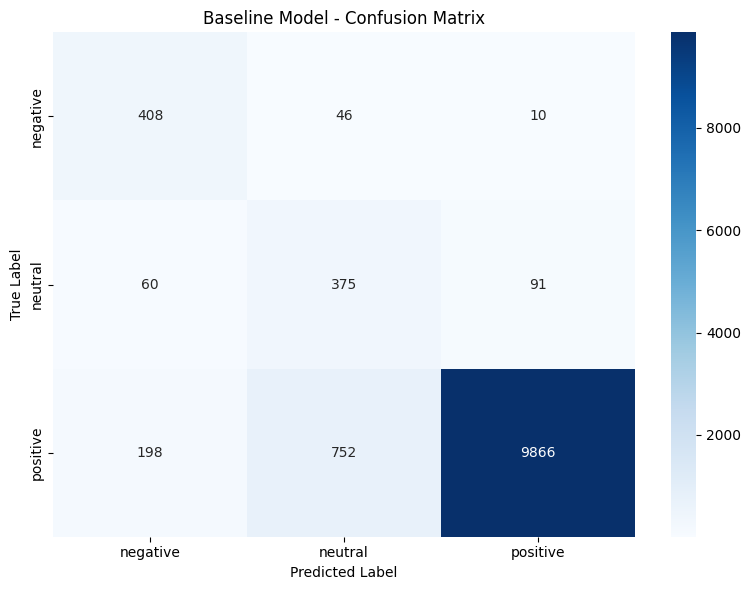


PART 4: PREDICTING ON FULL DATASET

Using Baseline Model for predictions...

Predictions complete!
Predicted sentiment distribution:
predicted_sentiment
positive    49794
neutral      5970
negative     3265
Name: count, dtype: int64

PIPELINE COMPLETE!


In [ ]:
df = run_complete_pipeline1(df)

In [23]:
df.head()

,product_name,categories,review_rating,review_text,review_title,image_urls,review_date,review_recommend,review_helpful_count,source_urls,review_username,review_username,data_source,sentiment,combined_text,predicted_sentiment,confidence_score,positive_proba
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,Adapter,Adapter,1429_1.csv,positive,Kindle This product so far has not disappointe...,positive,0.937978,0.937978
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,truman,truman,1429_1.csv,positive,very fast great for beginner or experienced pe...,positive,0.584655,0.584655
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,DaveZ,DaveZ,1429_1.csv,positive,Beginner tablet for our 9 year old son. Inexpe...,neutral,0.700156,0.275081
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,2017-01-13T00:00:00.000Z,True,0.0,NaN,Shacks,Shacks,1429_1.csv,positive,Good!!! I've had my Fire HD 8 two weeks now an...,positive,0.981253,0.981253
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,2017-01-12T00:00:00.000Z,True,0.0,NaN,explore42,explore42,1429_1.csv,positive,Fantastic Tablet for kids I bought this for my...,positive,0.972545,0.972545
